In [2]:
import pandas as pd
import data_util
from tqdm import tqdm_notebook as tqdm
from data_generator import DataGenerator
from state_util import StateUtil
from tec_an import TecAn
from data_agent import DataAgent, TacProcess
import numpy as np


In [3]:
data_gen = DataGenerator(random=False, base_dir = "data/backtest/")
data_gen.rewind()


In [ ]:
class StockAgent():
    
    def __init__(self, model = []):
        self.model = model
        
    def on_x(self, x):
        model.predict(x)
        
        
    def on_predicted(self, y):
        if (y > 0.5):
            self.buy()
        else:
            self.sell()
        
    def buy(self):
        test = 0
        #print(x)
        
    def sell(self):
        test = 0
        #print(x)

In [7]:

on_new_data = lambda x: print("lala {}".format(x))

agent = DataAgent(
    on_new_data = on_new_data
)

In [8]:
data_count = 10000
for i in tqdm(range(data_count)):
    agent.on_new_raw_data(data_gen.next())


<ipython-input-8-9f07faa4bcfa>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(data_count)):


  0%|          | 0/10000 [00:00<?, ?it/s]

lala [-3.3916299931042175, 0.5412390271469867, 1.3614258539604736, 0.0, 0.0, 0.0, 0.9964571968183179, -7.190851540155982, -8.289463828824092, 0.0, 0.0, 51.81298969939026, 0.0, -0.14444915930934213, -0.13375165952315687, -0.14444915930934213, 0.0, 0.0, 0.0, 0.0, 0.0005436808526717374, 0, 0, 0, 0, 0]
lala [2.825852640904543, 0.49620593793243983, 0.5069079732797231, 0.0, 0.0, 0.0, 0.998056252389101, -7.189442857804218, -8.288055146472328, 0.0, 0.0, 49.587969630142034, 0.0, -0.1226835010660647, -0.13153802783173846, -0.1226835010660647, 0.0, 0.0, 0.0, 0.0, 0.001501149573841201, 0, 0, 0, 0, 0]
lala [8.365365240606522, 0.5174952851564784, -0.195780594979674, 144.5758333333324, 0.0, 0.0, 0.9975836057893139, -7.1901367656171224, -8.288749054285232, 0.0, 0.0, 48.04016188789058, 0.0, -0.09869029133426649, -0.12496848053224408, -0.09869029133426649, 0.0, 0.0, 0.0, 0.0, 0.0015165143011843156, 0, 0, -0.0002817264077218282, 0.0028948352765372103, -0.0011269559440417747]
lala [8.085491140669944, 0.46

<AxesSubplot:xlabel='Date'>

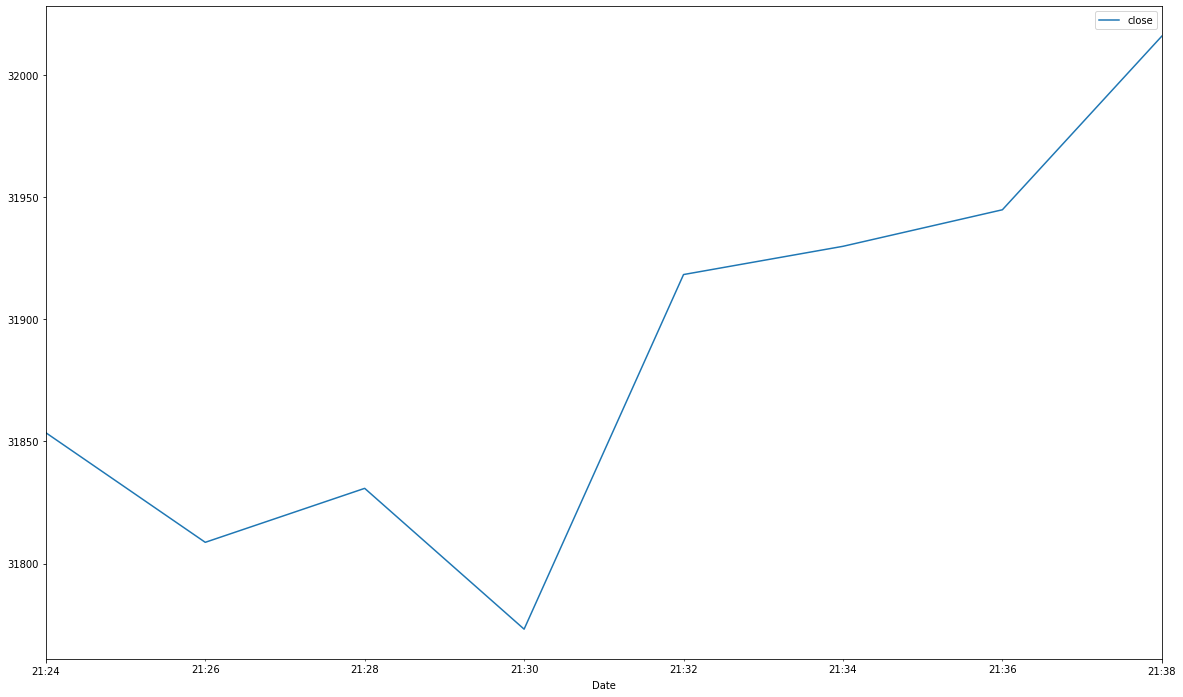

In [9]:
agent.ohlc.plot(figsize=(20, 12))

In [ ]:
agent.ohlc

In [ ]:
agent.ohlc